<a href="https://colab.research.google.com/github/brandiegriffin83/brandiegriffin83/blob/main/ITAI1371Class_Project_Linear_Regression_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---

#### **Problem #1.1**
This dataset contains historical statistics for NBA (National Basketball Association) players, sourced from Basketball-Reference.com. The data includes a wide range of metrics from basic statistics like games played and minutes played to more advanced statistics like player efficiency ratings. While the dataset is rich and detailed, we are only focusing on a subset of the available columns to introduce you to the basics of data exploration and manipulation.

<br>

**Even if you're not familiar with basketball, understanding the data columns should still be relatively straightforward. Here's what each column we're using means:**

- `player_id`: A unique ID assigned by Basketball-Reference.com to each player.

- `name_common`: The name of the basketball player.

- `year_id`: This refers to the NBA season year. For example, the 2019-2020 NBA season would be represented as "2000".

- `age`: The age of the player as of February 1 of that season.

- `team_id`: The abbreviation for the team that the player played for during that season. Each NBA team has a unique abbreviation, like 'LAL' for the Los Angeles Lakers.

- `G`: Games Played - The number of games the player participated in during that season.

- `Min`: Minutes Played - The total number of minutes the player was on the court during the season.

- `MPG`: Minutes Per Game - This is the average number of minutes the player was on the court per game during the season. It's calculated as Min divided by G.

- `FT%`: Free Throw Percentage - This is the percentage of free throws the player made successfully. A free throw is an opportunity given to a player to score one point, unopposed, from a position 15 feet from the basket. It's calculated as Free Throws Made divided by Free Throws Attempted.

<br>

**Run the code cell below to load the data.**

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv'
nba_df = pd.read_csv(url)
nba_df = nba_df[['player_id', 'name_common', 'year_id', 'age', 'team_id', 'G', 'Min', 'MPG', 'FT%']]
nba_df = nba_df.dropna()
nba_df

,player_id,name_common,year_id,age,team_id,G,Min,MPG,FT%
808,youngtr01,Trae Young,2019,20,ATL,81,2503,30.9,82.9
809,huertke01,Kevin Huerter,2019,20,ATL,75,2048,27.3,73.2
810,bembrde01,DeAndre' Bembry,2019,24,ATL,82,1931,23.5,64.0
811,collijo01,John Collins,2019,21,ATL,61,1829,30.0,76.3
812,bazemke01,Kent Bazemore,2019,29,ATL,67,1643,24.5,72.6
...,...,...,...,...,...,...,...,...,...
28163,weissbo01,Bob Weiss,1977,34,WSB,62,768,12.4,78.4
28164,riordmi01,Mike Riordan,1977,31,WSB,49,289,5.9,73.3
28165,weathni01,Nick Weatherspoon,1977,26,WSB,11,152,13.8,62.5
28166,pacejo01,Joe Pace,1977,23,WSB,30,119,4.0,55.2


#### **Problem #1.2**

How many players are included in this dataset?

In [5]:
# Count the number of unique players in the 'player_id' column (or 'name_common' if you prefer)
total_players = nba_df['player_id'].nunique()

print(f"Total number of players in this dataset: {total_players}")

Total number of players in this dataset: 3252


#### **Problem #1.3**

How many columns are in this DataFrame?

In [6]:
total_columns = nba_df.shape[1]
print(f"Total number of columns in the DataFrame: {total_columns}")

Total number of columns in the DataFrame: 9


#### **Problem #1.4**
How many columns contain numerical data?

In [7]:
# Get numerical columns
numerical_columns = nba_df.select_dtypes(include=['number'])

# Count the number of numerical columns
num_numerical_columns = numerical_columns.shape[1]

print(f"Total number of columns with numerical data: {num_numerical_columns}")


Total number of columns with numerical data: 6


#### **Problem #1.5**

How many different NBA teams (`team_id`) are included in the dataset?

In [8]:
# Count the number of unique teams in the 'team_id' column
num_teams = nba_df['team_id'].nunique()

print(f"Total number of different NBA teams in the dataset: {num_teams}")


Total number of different NBA teams in the dataset: 42


#### **Problem #1.6**

What is the most common `age` among all players in the dataset?

In [9]:
# Find the most common age
most_common_age = nba_df['age'].mode()[0]

print(f"The most common age among all players in the dataset is: {most_common_age}")



The most common age among all players in the dataset is: 23



#### **Problem #1.7**

Complete the code below to output players above the age of 35.


#### **Problem #1.8**

Extract the following columns: `player_id`, `age`, `FT%`

In [10]:
# Extract the specified columns
extracted_columns = nba_df[['player_id', 'age', 'FT%']]

# Display the resulting DataFrame
print("Extracted columns:")
print(extracted_columns.head())  # Display the first few rows


Extracted columns:
     player_id  age   FT%
808  youngtr01   20  82.9
809  huertke01   20  73.2
810  bembrde01   24  64.0
811  collijo01   21  76.3
812  bazemke01   29  72.6


In [11]:
# Define the condition for older players (e.g., age > 30) with FT% > 90
older_players = nba_df[(nba_df['FT%'] > 90) & (nba_df['age'] > 30)]

# Display the filtered DataFrame
print("Older players with FT% > 90:")
print(older_players)



Older players with FT% > 90:
       player_id     name_common  year_id  age team_id   G   Min   MPG    FT%
1060   bogutan01    Andrew Bogut     2019   34     GSW  11   134  12.2  100.0
1221   milescj01        CJ Miles     2019   31     MEM  13   294  22.6   92.9
1265   smithja02     Jason Smith     2019   32     MIL   6    40   6.7  100.0
1323   smithja02     Jason Smith     2019   32     NOP   2    20  10.0  100.0
1359   feltora01  Raymond Felton     2019   34     OKC  33   379  11.5   92.3
...          ...             ...      ...  ...     ...  ..   ...   ...    ...
26949  barryri01      Rick Barry     1979   34     HOU  80  2566  32.1   94.7
27042  vanlino01   Norm Van Lier     1979   31     MIL  38   555  14.6   90.4
27137  mcclate01     Ted McClain     1979   32     PHO  36   465  12.9   91.3
27401  barryri01      Rick Barry     1978   33     GSW  82  3024  36.9   92.4
27881  barryri01      Rick Barry     1977   32     GSW  79  2904  36.8   91.6

[276 rows x 9 columns]


####**Problem #1.9**
Identify players with a Free-Throw Percentage (`FT%`) greater than 90%.

In [12]:
# Filter players with FT% > 90%
high_ft_players = nba_df[nba_df['FT%'] > 90]

# Display the players
print("Players with FT% greater than 90%:")
print(high_ft_players[['player_id', 'name_common', 'FT%']])


Players with FT% greater than 90%:
       player_id      name_common    FT%
827    johnsbj01       BJ Johnson  100.0
927    porteot01  Otto Porter Jr.   90.6
937     hoodro01      Rodney Hood   91.2
944     loveke01       Kevin Love   90.4
953     adelde01        Deng Adel  100.0
...          ...              ...    ...
27881  barryri01       Rick Barry   91.6
27893  rogerma01  Marshall Rogers   93.3
27894  mcneila01    Larry McNeill   90.3
27918   wohlda01        Dave Wohl  100.0
27999  davismi02     Mickey Davis   92.0

[967 rows x 3 columns]


In [13]:
conditional = nba_df['FT%'] > 90
older_players = nba_df[conditional & (nba_df['age'] > 30)]




#### **Problem #1.10**

What is the average age of the players in the dataset?

In [14]:
# Calculate the average age of the players
average_age = nba_df['age'].mean()

print(f"The average age of the players in the dataset is: {average_age:.2f}")


The average age of the players in the dataset is: 26.72


#### **Problem #1.11**

What is the median value for the Minutes Per Game (`MPG`) across all players?

In [15]:
# Calculate the median MPG
median_mpg = nba_df['MPG'].median()

print(f"The median value for Minutes Per Game (MPG) across all players is: {median_mpg:.2f}")


The median value for Minutes Per Game (MPG) across all players is: 19.50


#### **Problem #1.12**

Calculate the sum of minutes played (`Min`) for all players in the dataset.

In [16]:
import pandas as pd

# Provide the correct dataset URL or file path
url = 'https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv'

# Load the dataset
nba_df = pd.read_csv(url)

# Filter relevant columns and drop missing values
nba_df = nba_df[['player_id', 'name_common', 'year_id', 'age', 'team_id', 'G', 'Min', 'MPG', 'FT%']].dropna()

# Calculate the sum of minutes played
total_minutes_played = nba_df['Min'].sum()

print(f"The total minutes played by all players in the dataset is: {total_minutes_played}")



The total minutes played by all players in the dataset is: 22847833


<a name="p2"></a>

---
## **Part 2: Data Visualizations**
---

<a name="p2.1"></a>

---
### **Part 2.1: Scatter Plots**
---

#### **Problem #2.1.1**

Create a scatter plot given the array `x_range` and array `y_range`. Add a title called "Random Variable Vs. Random Variable" to the graph. And add x- and y-labels that say "Random X" and "Random Y", respectively.

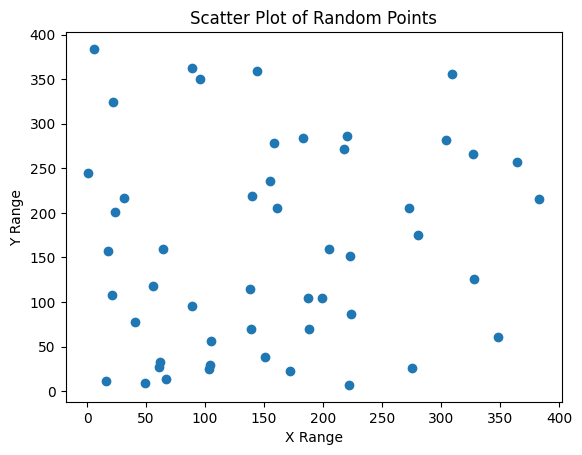

In [17]:


# Generate random data for x and y ranges
x_range = np.random.randint(400, size=50)
y_range = np.random.randint(400, size=50)

# Create a scatter plot
plt.scatter(x_range, y_range)
plt.title('Scatter Plot of Random Points')
plt.xlabel('X Range')
plt.ylabel('Y Range')
plt.show()


#### **Problem #2.1.2**

Given the following scatter plot, add the following labels and title:
* `Title`: "Distance vs Workout Duration"
* `X-axis`: "Distance (km)"
* `Y-axis`: "Workout Duration (min)"

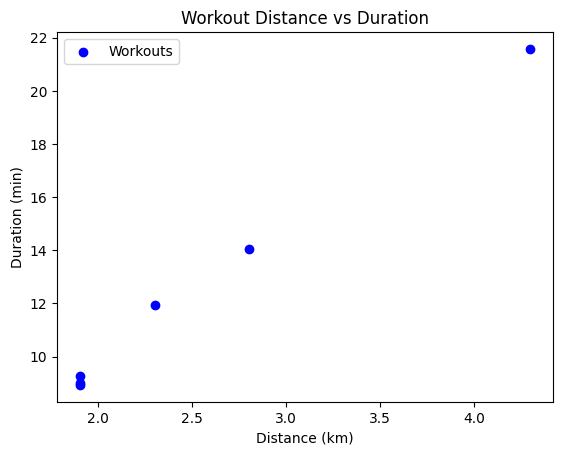

In [18]:


# Create the DataFrame
workout_df = pd.DataFrame({
    "date": ["10/17/21", "11/04/21", "11/18/21", "11/23/21", "11/28/21", "11/29/21"],
    "distance_km": [4.3, 1.9, 1.9, 1.9, 2.3, 2.8],
    "duration_min": [21.58, 9.25, 9.0, 8.93, 11.94, 14.05],
    "delta_last_workout": [1, 18, 14, 5, 5, 1],
    "day_category": [0, 1, 1, 0, 0, 0]
})

# Create a scatter plot
plt.scatter(workout_df['distance_km'], workout_df['duration_min'], c='blue', label='Workouts')
plt.title('Workout Distance vs Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (min)')
plt.legend()
plt.show()


#### **Problem #2.1.3**

Create a scatter plot for the following data. Make the title and labels the following:
* `Title`: "Age vs. height in teenagers"
* `X-axis`: "Age"
* `Y-axis`: "Height (in)"

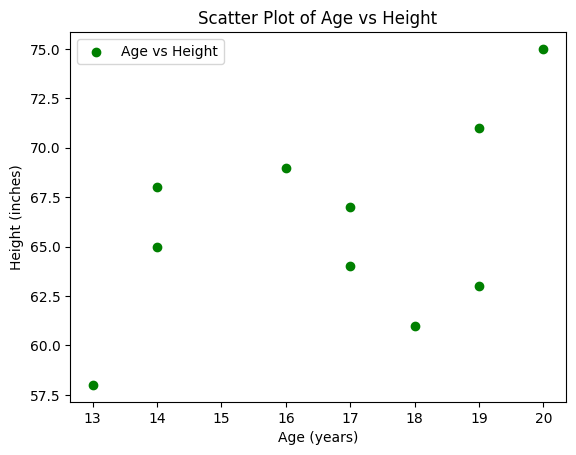

In [19]:
# Data for the scatter plot
age = [14, 14, 13, 18, 17, 20, 17, 16, 19, 19]
height = [65, 68, 58, 61, 64, 75, 67, 69, 71, 63]  # in inches

# Create the scatter plot
plt.scatter(age, height, color='green', label='Age vs Height')
plt.title('Scatter Plot of Age vs Height')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.legend()




<a name="p2.2"></a>

---
### **Part 2.2: Line Plots**
---

#### **Problem #2.2.1**

Create a line plot for the following data. Add a title called "Bike Rideshare Activity" with x-axis and y-axis labels called "Month" and "Bike Trips", respectively.

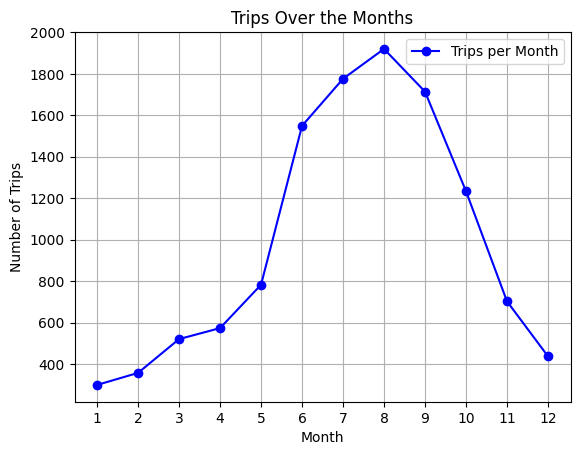

In [20]:
# Data for the line plot
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trips = [300, 358, 521, 574, 783, 1549, 1776, 1920, 1714, 1234, 703, 438]

# Create the line plot
plt.plot(months, trips, marker='o', linestyle='-', color='blue', label='Trips per Month')
plt.title('Trips Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(months)  # Ensure months are labeled correctly
plt.legend()
plt.grid(True)
plt.show()



#### **Problem #2.2.2**

Create a line plot for the following data. Add a title called "Unemployment rate over the years" with x-axis and y-axis labels called "Year" and "Unemployment", respectively.

In [21]:
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

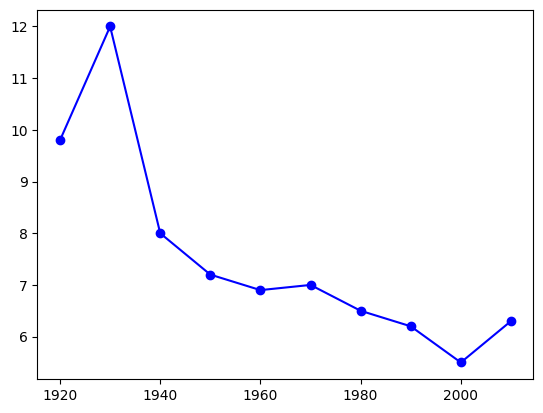

In [22]:
plt.plot(Year, Unemployment_Rate, marker='o', linestyle='-', color='blue', label='Unemployment Rate')


#### **Problem #2.2.3**

The information below contains data related to how many people have visited Disney parks globally. Create a line plot to show how the number of visits have changed between 2017 to 2020. Make sure you add in helpful labels and a title.

**Note:** Visitors is in millions. For example, in 2017, 150 million people visited Disney parks globally.

In [23]:
year = [2017, 2018, 2019, 2020]
visitors = [150, 157, 155.991, 43.525]

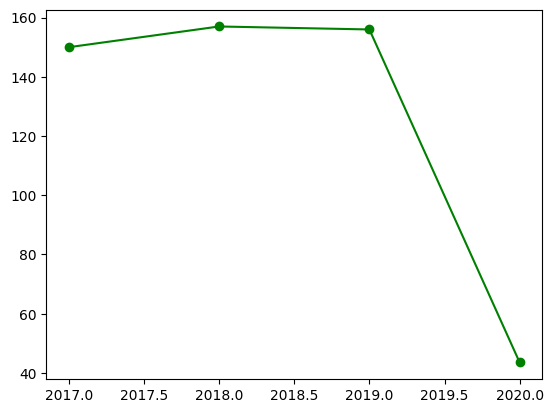

In [24]:
plt.plot(year, visitors, marker='o', linestyle='-', color='green', label='Visitors')



<a name="p2.3"></a>

---
### **Part 2.3: Bar Plots**
---

#### **Problem #2.3.1**

Now, plot the same data as above, but using a bar plot. In some cases, it may not be clear which plot will be best until you see your options!

In [25]:
year = ['2017', '2018', '2019', '2020']
visitors = [150, 157, 155.991, 43.525]

<BarContainer object of 4 artists>

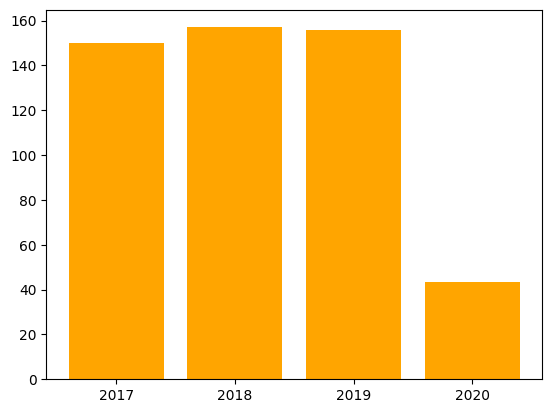

In [26]:
plt.bar(year, visitors, color='orange', label='Visitors')


#### **Problem #2.3.2**

Create a bar plot for the following data. Add a title called "Favorite Types of Drinks" with x-axis and y-axis labels called "Drink" and "Number of People", respectively.

<BarContainer object of 5 artists>

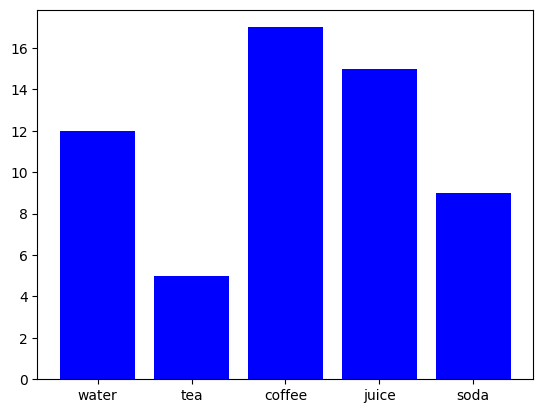

In [27]:
drinks = ["water", "tea", "coffee", "juice", "soda"]
people = [12, 5, 17, 15, 9]

plt.bar(drinks, people, color='blue', label='Number of People')



#### **Problem #2.3.3**

Create a bar plot using the DataFrame below. Add labels: `Innovative companies` for the title, `Countries` for the x-axis label, and `Number of Companies` for the y-axis label.

In [28]:
companies_df = pd.DataFrame({"countries": ["USA", "South Korea", "China", "Japan", "Germany", "Netherlands", "India", "France", "London", "Switzerland", "Sweden", "Italy"],
             "companies": [25, 2, 3, 3, 6, 1, 3, 1, 1, 2, 2, 1]})

companies_df.head()

# add code


,countries,companies
0,USA,25
1,South Korea,2
2,China,3
3,Japan,3
4,Germany,6


<a name="p2.4"></a>

---
### **Part 2.4: Improving Visualizations [OPTIONAL]**
---

#### **Problem #2.4.1**

Using the following data, create a line plot.

**Hint:** Your graph should have three distinct lines corresponding to `y1`, `y2`, and `y3`.

In addition:
* Make sure each line is a different color
* Make `y1` a dashed line
* Add a grid to the background and make the background color black
* Add a legend

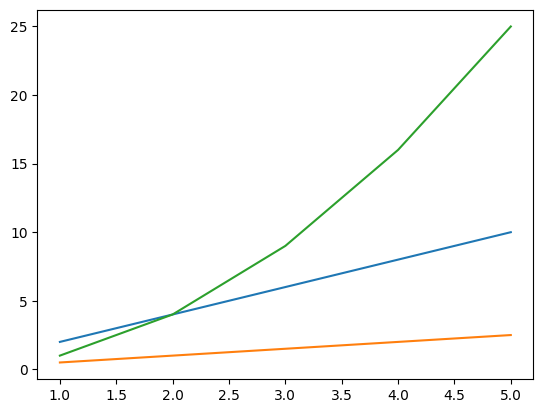

In [29]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10] # y = 2x
y2 = [0.5,1,1.5,2,2.5] # y = 0.5x
y3 = [1,4,9,16,25] # y = x^2

plt.plot(x, y1, label='y = 2x')
plt.plot(x, y2, label='y = 0.5x')
plt.plot(x, y3, label='y = x^2')

#### **Problem #2.4.2**

Using the following data, create a scatter plot. In addition:
* Make the data points green
* Change the transparency to 0.6
* Make the x-label `Temperature (Fahrenheit)` and in the font `fantasy`
* Make the y-label `Number of People` and in the font `fantasy`
* Make the title `Number of People at the Beach` and in the font `fantasy`

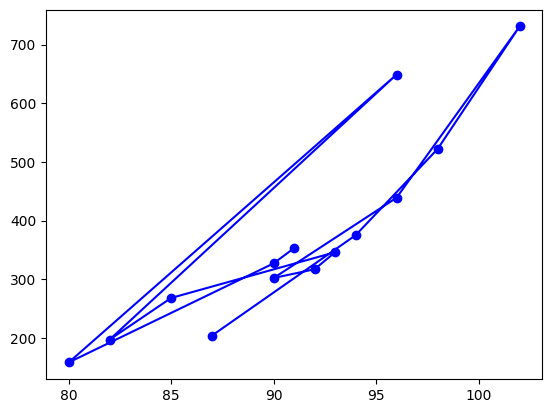

In [30]:
# x axis values
x = [87, 94, 98, 102, 96, 90, 92, 93, 85, 82, 96, 80, 90, 91]
# corresponding y axis values
y = [204, 375, 522, 731, 439, 302, 317, 346, 268, 197, 649, 158, 327, 353]

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Data points')

#### **Problem #2.4.3**

Using the following data, create a bar plot. In addition:
* Make each bar's color the same as the color name
* Make the x-label `Favorite Color` and with a font size of 12
* Make the y-label `Number of People` and with a font size of 12
* Make the title `Number of People vs Favorite Color` and with a font size of 20
* Make the bar width 0.6

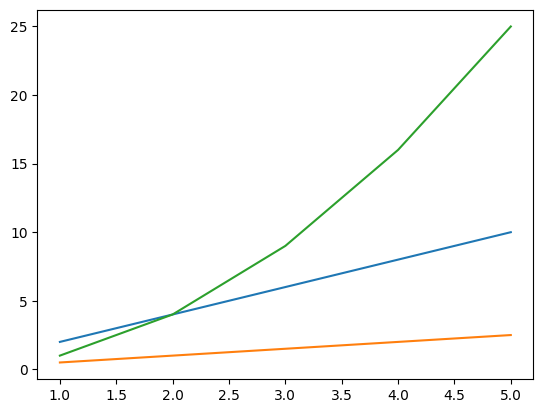

In [31]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10]
y2 = [0.5,1,1.5,2,2.5]
y3 = [1,4,9,16,25]

plt.plot(x, y1, label='y = 2x')
plt.plot(x, y2, label='y = 0.5x')
plt.plot(x, y3, label='y = x^2')

#### **Problem #2.4.4**

Using the following data, create a line plot. In addition:
* Make line y1 brown and dashed, and make line y2 pink
* Add a grid to the background
* Add a legend
* Make the title `X vs Y` in font `monospace` and in size 18


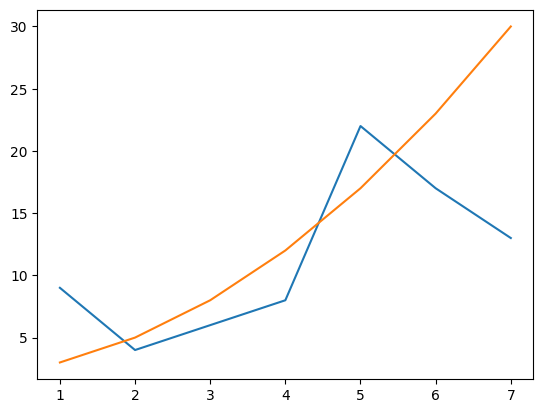

In [32]:
# x axis values
x = [1,2,3,4,5,6,7]
# corresponding y axis values
y1 = [9, 4, 6, 8, 22, 17, 13]
y2 = [3, 5, 8, 12, 17, 23, 30]

plt.plot(x, y1, label='y1 = Data 1')
plt.plot(x, y2, label='y2 = Data 2')

#### **Problem #2.4.5**

Create a bar plot for the following data with the following:
* One bar showing the number of females in the dataset and another bar showing the number of males in the dataset.
* Bars labeled 'Female' and 'Male'.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Number of Males and Females in the Dataset" with extra large font.

<br>

**Hint**: You will need to use pandas functions to get the count of males and females in the data frame.

In [33]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)
df.head()
(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart attack
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.612261,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.931914,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


#### **Problem #2.4.6**

Create a *grouped* bar plot for the following data with the following:
* One bar graph showing the number of females with heart attacks and without in the dataset.
* This bar graph should be labeled 'Female' for the legend.
* Another bar graph showing the number of males with heart attacks and without in the dataset.
* This bar graph should be labeled 'Male' for the legend.
* Both bar graphs should be located on the x-axis and given a width to make the graph readable.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Breakdown of Heart Attacks by Sex" with extra large font.

<br>

**Hint**: You will need to use pandas functions and comparisons to get the count of males and females with and without heart attacks in the data frame.

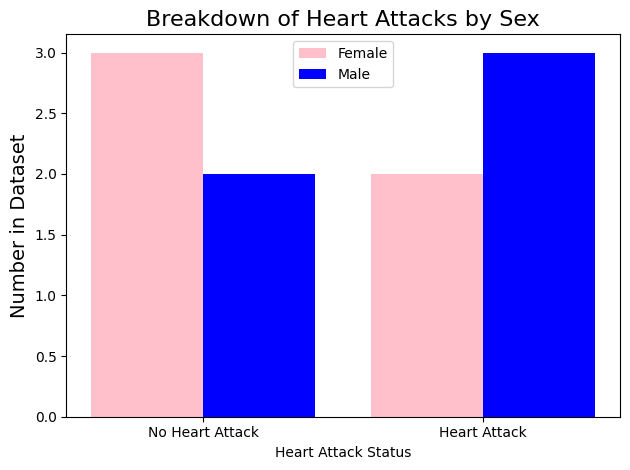

In [34]:


# Simulate a dataset with sex and heart attack occurrence
data = {
    "sex": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "heart_attack": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]  # 1 = Heart Attack, 0 = No Heart Attack
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count occurrences for males and females with and without heart attacks
male_counts = df[df["sex"] == "Male"]["heart_attack"].value_counts()
female_counts = df[df["sex"] == "Female"]["heart_attack"].value_counts()

# Align counts to ensure both categories (0 and 1) exist for plotting
male_counts = male_counts.reindex([0, 1], fill_value=0)
female_counts = female_counts.reindex([0, 1], fill_value=0)

# Data for grouped bar plot
labels = ["No Heart Attack", "Heart Attack"]
x = range(len(labels))
width = 0.4  # Width of the bars

# Create the plot
plt.bar(x, female_counts, width=width, label="Female", color="pink", align="center")
plt.bar([i + width for i in x], male_counts, width=width, label="Male", color="blue", align="center")

# Add title and labels
plt.title("Breakdown of Heart Attacks by Sex", fontsize=16)
plt.xlabel("Heart Attack Status")
plt.ylabel("Number in Dataset", fontsize=14)
plt.xticks([i + width / 2 for i in x], labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### **Comment on this Dataset**

This is an unfortunately common case of biased data, specifically *unbalanced data*, leading to potentially harmful results. We could attempt removing `'Sex'` as a feature to blind any ML models to the sex of the patient. However, bias often runs deeper than the most superficial variables and may be correlated with others in ways that humans and especially advanced ML algorithms can still pick up on. Consider some of the following ideas for improving on these results:

* Using statistical methods for balancing the data. For instance, upsampling and downsampling are common first approaches to tackling this problem.

* Find a dataset that is more balanced to begin with. In an ideal world, we would make sure that the data is balanced (representative) upon collection.

<a name="p3"></a>

---
## **Part 3: Linear Regression**
---

Using the  dataset, do the following:
* Build a model that can predict the total number of bike rentals.
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results.

<br>

The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [35]:
# Import required libraries
import urllib.request
import zipfile

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True).drop(columns = ['instant', 'dteday', 'casual', 'hr'])




#### **Step #2: Choose your Variables**

We are using all available features to predict `cnt`.


In [36]:
inputs = bikes_df.drop(columns=['cnt'], axis=1)  # Features (independent variables)
output = bikes_df['cnt']  # Target variable (dependent variable)

#### **Step #3: Split your Data**


In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs,output,test_size=0.2,random_state=42) # COMPLETE THIS CODE

#### **Step #4: Import an ML Algorithm**




In [38]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(inputs, output)

# Print the model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Use the model to make predictions
predictions = model.predict(inputs)

Model Coefficients: [ -3.41645318  -8.52439786  -0.56478625 -17.86745418   1.31893293
 -83.82467543   0.66013924  93.25510995  21.98629181 -34.34199683
 -15.98223448   1.22000943]
Model Intercept: 40.68166986146821


#### **Step #5: Initialize the Model**


In [39]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(inputs, output)

# Output the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Make predictions using the model
predictions = model.predict(inputs)
print("Predictions:", predictions)


Model Coefficients: [ -3.41645318  -8.52439786  -0.56478625 -17.86745418   1.31893293
 -83.82467543   0.66013924  93.25510995  21.98629181 -34.34199683
 -15.98223448   1.22000943]
Model Intercept: 40.68166986146821
Predictions: [  62.02835217   83.35265742   77.25261028 ... 1474.3578856  1776.4245286
 2737.33340108]


#### **Step #6: Fit, Test, and Visualize**


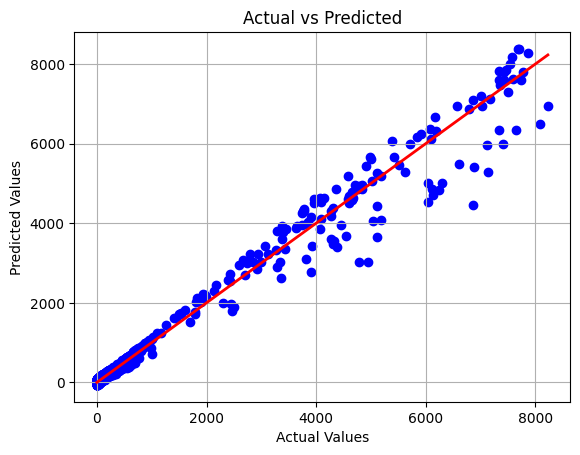

Mean Squared Error: 19319.804203060503
R-squared: 0.9794778885664651


In [40]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

# Step 6.1: Fit the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6.2: Test the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6.3: Visualize Results
# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x for reference
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Step 6.4: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [41]:
predictions = y_pred = model.predict(X_test)

In [42]:
plt.figure(figsize=(8, 8))



<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, evaluate the model using our standard regression metrics: $R^2$, MSE, and MAE.


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model using R2, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R-squared (R2): 0.9795
Mean Squared Error (MSE): 19319.8042
Mean Absolute Error (MAE): 50.6822


#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [44]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

# Convert class values to more meaningful labels
star_map = {0: 'red dwarf', 1: 'brown dwarf', 2: 'white dwarf', 3: 'main sequence', 4: 'super giant', 5: 'hyper giant'}
stars_df['class'] = stars_df['class'].map(star_map)

# Encode color feature so we can use it in our modeling
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
stars_df['color'] = enc.fit_transform(stars_df[['color']]).astype(int)



stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,8,red dwarf
1,3042,0.000500,0.1542,8,red dwarf
2,2600,0.000300,0.1020,8,red dwarf
3,2800,0.000200,0.1600,8,red dwarf
4,1939,0.000138,0.1030,8,red dwarf


#### **Step #2: Choose your Variables**



In [45]:
# Separate inputs and output
inputs = stars_df.drop(columns=['class'], axis=1)  # Independent variables (features)
output = stars_df['class']  # Dependent variable (target)

# Display the inputs
print(inputs.head())


   temperature  brightness    size  color
0         3068    0.002400  0.1700      8
1         3042    0.000500  0.1542      8
2         2600    0.000300  0.1020      8
3         2800    0.000200  0.1600      8
4         1939    0.000138  0.1030      8


#### **Step #3: Split your Data**


In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs,output,test_size=0.2,random_state=42) # COMPLETE THIS CODE# COMPLETE THIS CODE

#### **Step #4: Import an ML Algorithm**




In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default number of neighbors is 5

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6667

Classification Report:
               precision    recall  f1-score   support

  brown dwarf       0.80      0.57      0.67         7
  hyper giant       0.50      0.45      0.48        11
main sequence       1.00      0.88      0.93         8
    red dwarf       0.70      0.88      0.78         8
  super giant       0.33      0.38      0.35         8
  white dwarf       0.86      1.00      0.92         6

     accuracy                           0.67        48
    macro avg       0.70      0.69      0.69        48
 weighted avg       0.68      0.67      0.67        48



#### **Step #5: Initialize the Model**

Use K = 5 here.

In [48]:
model = KNeighborsClassifier(n_neighbors=5)# COMPLETE THIS CODE

#### **Step #6: Fit and Test**


In [49]:
model.fit(X_train, y_train) # COMPLETE THIS CODE

KNeighborsClassifier()

In [50]:
predictions = model.predict(X_test)# COMPLETE THIS CODE

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


In [51]:
print(accuracy_score(y_test,predictions)) # COMPLETE THIS CODE

0.6666666666666666


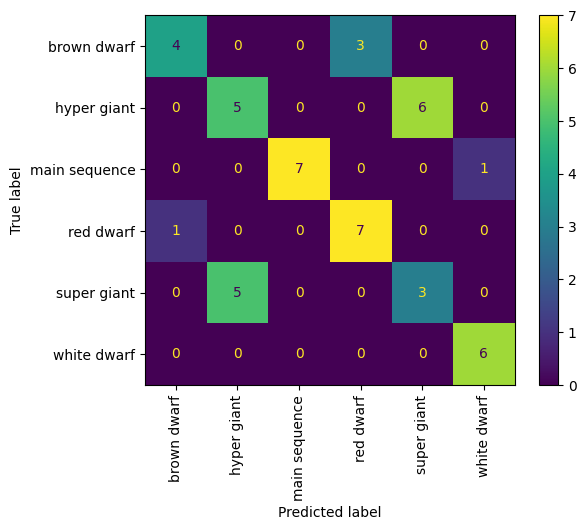

In [52]:
#cm = confusion_matrix(# COMPLETE THIS CODE
#disp = ConfusionMatrixDisplay(# COMPLETE THIS CODE
cm = confusion_matrix(y_test, predictions, labels=model.classes_)# COMPLETE THIS CODE
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.xticks(rotation=90)
plt.show()

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


The stars' `temperature`, `brightness`, `size`, and `color` are as follows:

1. `10500`, `107200`, `240`, `6`.

2. `10500`, `107200`, `240`, `0`.

3. `1900`, `0.0001`, `0.01`, `3`.

4. `9000`, `100`, `10`, `3`.

In [53]:
#new_star=pd.Dataframe(# COMPLETE THIS CODE

new_star = pd.DataFrame([[10500, 107200, 240,6]], columns= X_train.columns)
new_pred = model.predict(new_star)
print(new_pred)

['hyper giant']


In [54]:
# Star 2
new_star = pd.DataFrame([[10500, 107200, 240, 0]], columns=X_train.columns)  # Changed color to 0
new_pred = model.predict(new_star)
print(f"Prediction for Star 2: {new_pred[0]}")

Prediction for Star 2: hyper giant


In [55]:
# Star 3
new_star = pd.DataFrame([[1900, 0.0001, 0.01, 3]], columns=X_train.columns)
new_pred = model.predict(new_star)
print(f"Prediction for Star 3: {new_pred[0]}")

Prediction for Star 3: red dwarf


In [56]:
# Star 4
new_star = pd.DataFrame([[9000, 100, 10, 3]], columns=X_train.columns)
new_pred = model.predict(new_star)
print(f"Prediction for Star 4: {new_pred[0]}")

Prediction for Star 4: main sequence


#### **NOTE**: We encourage you to try working through this section with logistic regression too.

---
#End of Notebook

© 2024 The Coding School, All rights reserved